In [1359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [1360]:
data = pd.read_csv('dados_rpm_10hz.csv')

In [1361]:
resposta = data['rpm']

In [1362]:
freq_de_corte = 0.1 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()
print(resposta_filtrada.iloc[300:1400].max(), resposta_filtrada.iloc[300:1400].min())

0    8245.462949
dtype: float64 0   -5.504512
dtype: float64


In [1363]:
# Frequência de amostragem (baudrate)
sampling_freq = 115200.0

# Calcula o tempo de coleta de cada amostra
tempo_de_coleta = np.array(pd.read_csv('tempo_de_coleta_10hz.csv'))
print(tempo_de_coleta)

[[0.00000000e+00]
 [8.68055556e-06]
 [1.73611111e-05]
 ...
 [9.52256944e-03]
 [9.53125000e-03]
 [9.53993056e-03]]


In [1364]:
tensao = pd.read_csv('dados_senoide_10hz.csv')

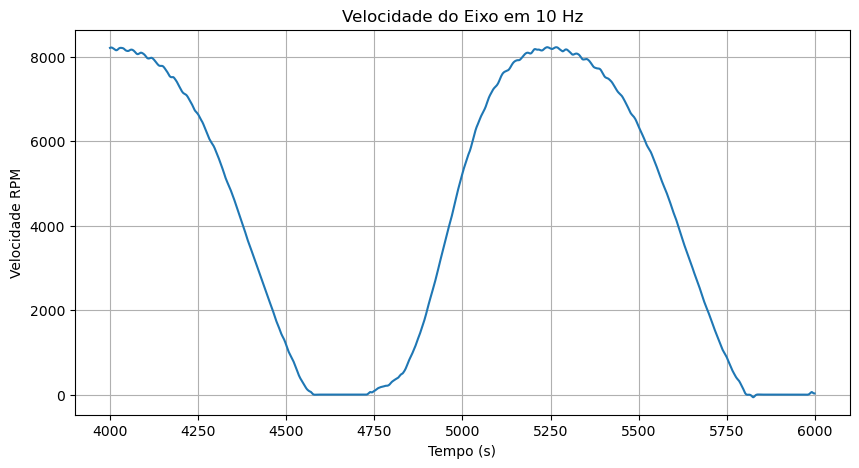

In [1365]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(resposta_filtrada.iloc[4000:6000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

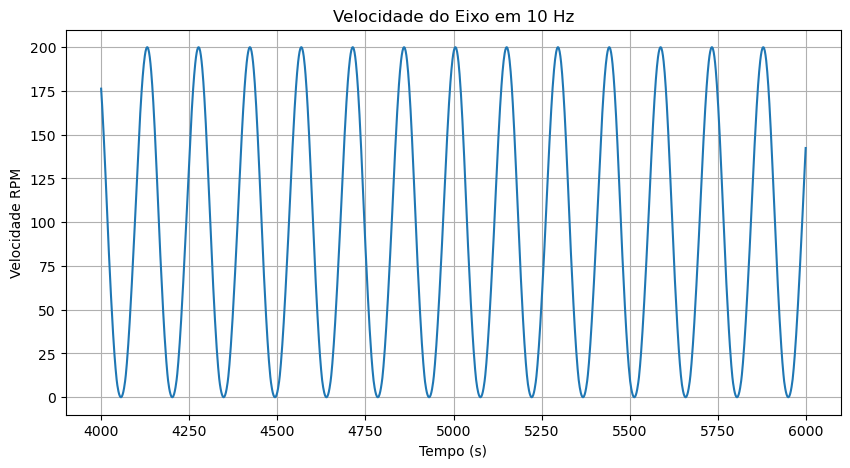

In [1366]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(tensao['tensao'].iloc[4000:6000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

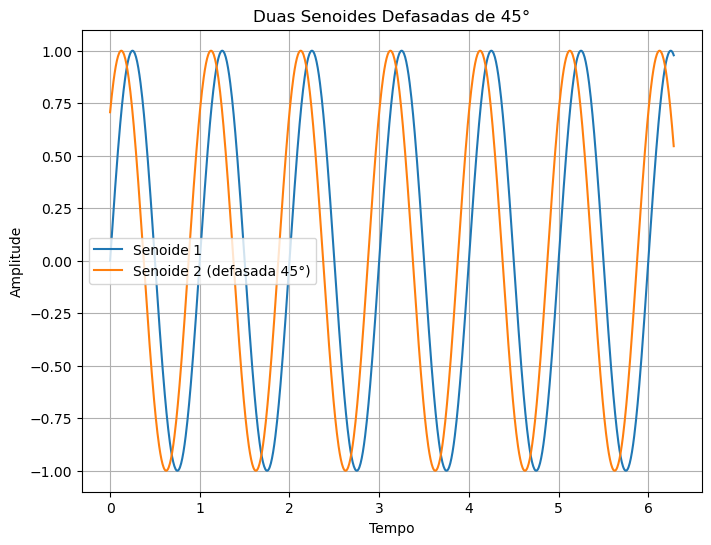

In [1367]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
amplitude = 1
frequencia = 1
fase = 0
defasagem = np.pi / 4  # 45 graus em radianos

# Definindo o intervalo de tempo
tempo = np.linspace(0, 2*np.pi, 1000)

# Senoide 1
senoide1 = amplitude * np.sin(2 * np.pi * frequencia * tempo + fase)

# Senoide 2 com defasagem de 45 graus
senoide2 = amplitude * np.sin(2 * np.pi * frequencia * tempo + fase + defasagem)

# Plotagem
plt.figure(figsize=(8, 6))
plt.plot(tempo, senoide1, label='Senoide 1')
plt.plot(tempo, senoide2, label='Senoide 2 (defasada 45°)')
plt.title('Duas Senoides Defasadas de 45°')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [1368]:
print(resposta_filtrada.values.flatten())

[570.1248685  581.66363192 597.16234395 ...  -4.1899862   -1.17864285
   0.86804568]


In [1369]:
amostras = resposta_filtrada.values.flatten()
num_amostras = len(amostras)

In [1370]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 10
print(f"Frequência de amostragem estimada: {Fs} Hz")


Frequência de amostragem estimada: 728.4615384615383 Hz


In [1371]:
print(resposta_filtrada.max(), resposta_filtrada.min())

0    8255.058888
dtype: float64 0   -77.903647
dtype: float64


In [1372]:
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

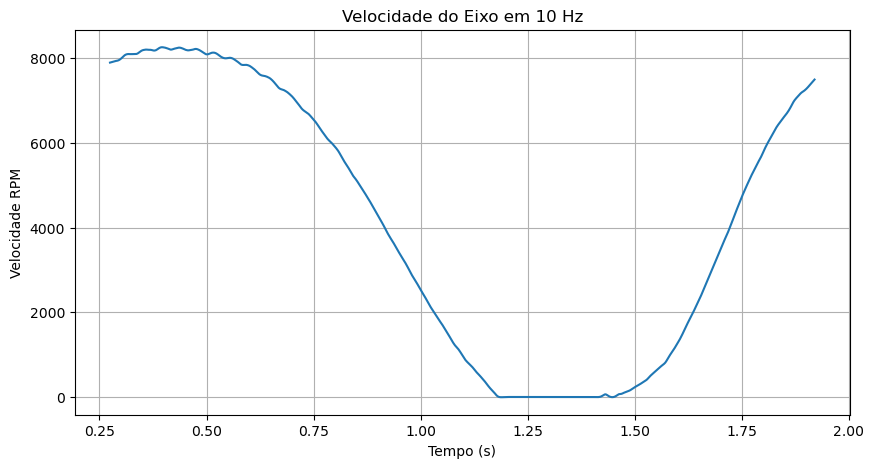

In [1373]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[200:1400], resposta_filtrada.iloc[200:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [1374]:
# Valores máximo original e desejado
max_original = 7200
max_desejado = 3300

# Calcular a constante de escala
constante_de_escala = max_desejado / max_original
print(f'Constante de Escala: {constante_de_escala}')


Constante de Escala: 0.4583333333333333


In [1375]:
# Ajustar as amostras
data['amostra_ajustada'] = resposta_filtrada * constante_de_escala
data['tempo'] = t

# Exibir as primeiras linhas do DataFrame ajustado para verificar
# display(data.iloc[1350:1400])
data.to_csv('dados_rpm_10hz.csv', index=False)


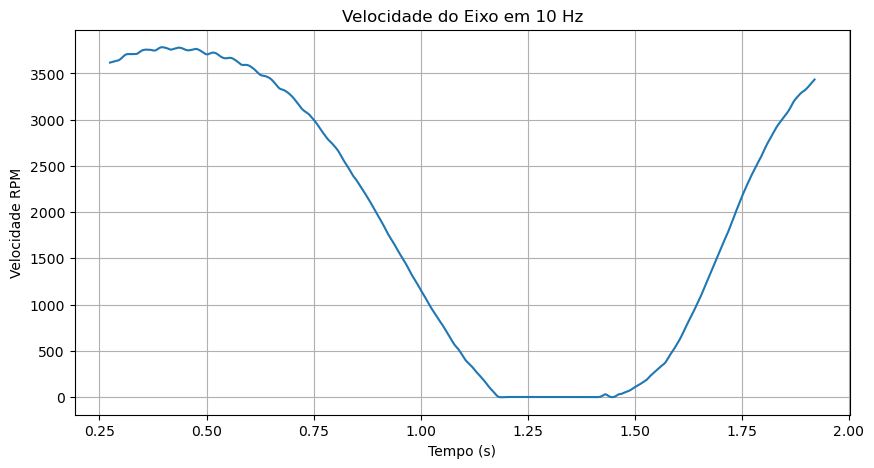

In [1376]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[200:1400], data['amostra_ajustada'].iloc[200:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [1377]:
data_tensao = pd.read_csv('dados_senoide_10hz.csv')

In [1378]:
amplitude1 = data['amostra_ajustada'].iloc[300:1400]

In [1379]:
amostras = tensao['tensao']

import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 10
print(f"Frequência de amostragem estimada: {Fs} Hz")

Frequência de amostragem estimada: 1458.0 Hz


In [1380]:
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

In [1381]:
tensao['tempo'] = t
tensao.to_csv('dados_senoide_10hz.csv', index=False)